# Gradient Descent Optimization

## Table of contents:
* [Vanilla Gradient Descent](#vanilla)
* [Stochastic Gradient Descent](#sgd)
* [Minibatch Gradient Descent](#minibatch)
* [Momentum](#momentum)
* [Nesterov Momentum](#nag)
* [Adagrad](#nag)
* [RMS Prop](#rms)
* [Adam](#adam)

# Non-linear logistic regression

In the linear logistic regressions for 2-class classifications, we employed such bases, using $\mathbf{x} \leftarrow \big[1, \mathbf{x}^{T} \big]^{T}$ and $\mathbf{\phi} \leftarrow \big[\phi_{0},\mathbf{\phi}^{T} \big]^{T}$,

$$\begin{align}
p(w=1|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
p(w=0|\mathbf{x}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{x}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{x}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{x})}\\
Bern_{w}(\mathbf{a}) \quad & = &\quad \prod_{i}^{N} a_{i}^{w_{i}}(1 - a_{i})^{1 - w_{i}}
\end{align}$$

We extend the linear logistic regressions to employ non-linear bases.

$$\begin{align}
p(w=1|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
p(w=0|\mathbf{z}, \mathbf{\phi}) \quad & = &\quad 1 - Bern_{w}\bigg[ sig\big[\mathbf{\phi}^{T}
\mathbf{z}\big]\bigg]\\
sig\big[\mathbf{\phi}^{T}\mathbf{z}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z})}
\end{align}$$

Here, for a choice of $K$ and $f$,

$$\begin{align}
\mathbf{z} \quad & = &\quad \big[1, f_{1}(\mathbf{x}), \cdots, f_{K}(\mathbf{x})\big]^{T}
\end{align}$$

Among the choice of $f$'s,

$$\begin{align}
z_{k} \quad & = &\quad heaviside[\mathbf{\alpha}_{k}^{T}\mathbf{x}] \quad & = &\quad 1 \quad if \quad \mathbf{\alpha}_{k}^{T}\mathbf{x} > 0 \quad and \quad 0 \quad otherwise\\
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
z_{k} \quad & = &\quad gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda] \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)
\end{align}$$

Let us concatenate all the parameters.

$$\begin{align}
\mathbf{\theta} \quad & = &\quad \big[\mathbf{\phi}^{T}, \mathbf{\alpha}_{1}^{T}, \cdots,  \mathbf{\alpha}_{K}^{T} \big]^{T}
\quad & = &\quad \big[\phi_{0}, \phi_{1}, \cdots, \phi_{K}, \alpha_{1, 1}, \cdots, \alpha_{D, 1}, \cdots, \alpha_{1, K}, \cdots, \alpha_{D, K} \big] \quad \Rightarrow \quad _{(K+1 + KD) \times 1}\\
\end{align}$$

We can choose the loglikelihood as the logistic cost function.

$$\begin{align}
L(\mathbf{\theta}) \quad & = &\quad log \bigg[Bern_{w}(\mathbf{a}) \bigg]\\
 \quad & = &\quad \sum_{i}^{N} w_{i}log(a_{i}) + (1 - w_{i})log(1 - a_{i}) \\
 \quad & = &\quad \sum_{i}^{N} w_{i}log\bigg(\frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}\bigg) + (1 - w_{i})log \bigg( \frac{exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z_{i}})} \bigg) \\
\end{align}$$

Let us write the following explicitly for the case of $z_{i, k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}_{i}, \lambda]$

$$\begin{align}
a_{i} \quad & = &\quad \mathbf{\phi}^{T}\mathbf{z_{i}} \quad & = &\quad \sum_{k=0}^{K} \phi_{k}z_{i,k} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} z_{i,k}
\end{align}$$

In order to minimize the cost function, we employ gradient descents which requires first order derivative of the cost function with respect to the parameters.

$$\begin{align}
\frac{\partial L(\mathbf{\theta})}{\partial\theta_{j}} \quad & = &\quad - \sum_{i}^{N} ( w_{i} - sig[a_{i}]) \frac{\partial a_{i}}{\partial\theta_{j}}
\end{align}$$

When $z_{k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda]$,

$$\begin{align}
z_{k} \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} exp\bigg(-\frac{1}{\lambda}\sum_{d=1}^{D} ({x}_{i, d} - \alpha_{d, k})^{2}\bigg)
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{z_{i, k}}{\lambda}(x_{i,d} - \alpha_{dk})\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

When $z_{k} = arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]$,

$$\begin{align}
z_{k} \quad & = &\quad arctan[\mathbf{\alpha}_{k}^{T}\mathbf{x}]\\
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} arctan \bigg[\alpha_{d, 0}\cdot 1 + \sum_{d=1}^{D} \alpha_{d, k}{x}_{i, d}\bigg]
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{x_{i, d}}{1 + z_{i, k}^{2}}\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [3]:
def generate_data_set_dim2_nonlinear(ns):
    """
    this function generates a 2d data set of two classes which are linearly separated.
    
    Arguments:
        ns: number of samples
    
    Output:
        ds1: data on the negative side (3, ns). ds1[1] = 0 is the label.
        ds2: data on the positive side (3, ns). ds2[1] = 0 is the label.
        data  : data combined ds1 and ds2 and shuffled. (2, ns)
        label : label combined ds1 and ds2 and shuffled. (2, ns)
        datab : data combined ds1 and ds2 and shuffled. datab[0] = 1 for bias. (3, ns)
    """
    ns_neg1 = int(0.25 * ns)
    ns_neg2 = int(0.25 * ns)
    ns_neg  = ns_neg1 + ns_neg2
    ns_pos1 = int(0.25 * ns)
    ns_pos2 = ns - ns_neg1 - ns_neg2 - ns_pos1
    ns_pos  = ns_pos1 + ns_pos2
    amp = 5.
    mus = amp * np.array([-1., 1., -1., 1.])
    
    dt_neg1 = np.random.standard_t(3, size=ns_neg1) + mus[0]
    dt_neg2 = np.random.standard_t(3, size=ns_neg2) + mus[1]
    ds1x = np.hstack((dt_neg1, dt_neg2))
    ds1y = 1.5 * amp * (np.random.rand(ns_neg) - .5)
    ds1 = np.vstack((ds1x, ds1y))
    
    dt_pos1 = np.random.standard_t(3, size=ns_pos1) + mus[2]
    dt_pos2 = np.random.standard_t(3, size=ns_pos2) + mus[3]
    ds2x = np.hstack((dt_pos1, dt_pos2))
    ds2y = 1.5 * amp * (np.random.rand(ns_pos) - .5)
    ds2 = np.vstack((ds2x, ds2y))
    
    ang = 0.25 * np.pi
    c, s = np.cos(ang), np.sin(ang)
    rot1 = np.array([[c, s], [-s, c]])
    
    ang = -ang
    c, s = np.cos(ang), np.sin(ang)
    rot2 = np.array([[c, s], [-s, c]])
    
    ds1 = np.dot(rot1, ds1)
    ds2 = np.dot(rot2, ds2)
    
    ds1s = np.vstack((ds1, np.zeros(ns_neg)))
    ds2s = np.vstack((ds2, np.ones(ns_pos)))
    ds = np.hstack((ds1s, ds2s))
    np.random.shuffle(ds.T)
    
    data = ds[:2]
    label = ds[2][np.newaxis, :]
    
    datas, mu, sg = scale_coordinates(data)
    ds1s = (ds1[:2] - mu)/sg
    ds2s = (ds2[:2] - mu)/sg
    
    plt.plot(ds1s[0], ds1s[1], 'r.', markersize=3)
    plt.plot(ds2s[0], ds2s[1], 'b.', markersize=3)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    return ds1s, ds2s, datas, label


def plot_decision_boundary_dim2(phi, alp, lmd):
    """
    this function computes sigmoid function
    
    Arguments:
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)
        ddLdtdt: ((K+1+KD), (K+1+KD))
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = alp.shape[0]
    K = alp.shape[1]
    K1 = phi.shape[1]
    N = 201
    nn = N**2
    x = np.linspace(-3, 3, N)
    y = np.linspace(-3, 3, N)
    xg, yg = np.meshgrid(x, y)
    xss = xg.reshape(1, nn)
    yss = yg.reshape(1, nn)
    xys = np.vstack((xss, yss))
    z = radial_basis(xys, alp, lmd, D, K, nn)
    bd = sigmoid(z, phi).reshape(N, N)
    bd = np.flipud(bd)
    plt.imshow(bd, extent=[-3, 3, -3, 3])
    return bd


def scale_coordinates(x):
    mu = x.mean(keepdims=1)
    sg = x.std()
    xs = (x - mu)/sg
    return xs, mu, sg


In [4]:
def radial_basis(x, alp, lmd, D, K, N):
    """
    this function computes sigmoid function
    
    Arguments:
        x:   (D, ns)  D contains bias as well.
        label:   (1, ns)
        phi  :   (1, D)
        alpha:   scalar
        sgp  :   scalar. prior sigma
    
    Output:
        bases: (D, nx).
    """
    assert alp.shape[0] == x.shape[0]
    bases = np.ones((K + 1, N))
    for i in range(1, K + 1):
        bases[i, :] = spst.multivariate_normal.pdf(x.T, mean=alp[:, i-1], cov=lmd*np.eye(D))
    return bases


def dRB_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    assert alp.shape[0] == x.shape[0]
    xx = np.tile(x, (K, 1))
    alpx = np.reshape(alp.T, (K*D, 1))
    zx = np.kron(z[1:], np.ones((D, 1)))
    dzdalp = (xx - alpx) * zx / lmd
    return dzdalp

In [5]:
def dz_dalp(x, z, alp, lmd, D, K, N):
    """
    this function generates dRB/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        dzdalp: ((KD), N)
    """
    return dRB_dalp(x, z, alp, lmd, D, K, N)


def da_dphi(z):
    """
    this function generates da/dphi.
    
    Arguments:
        z: generated bases including bias at the zeroth row. ((K+1), N).
    
    Output:
        z: da/dphi. ((K+1), N)
    """
    return z


def da_dalp(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1), N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        phit  : phi_trancated. without bias. (1, K)
        phix  : phi_extended.  (1, KD)
        dzda  : dzdalp. ((KD), N)
        xx    : (K*D, N)
        alpx  : (K*D, 1)

    Output:
        da/dalp: (K*D, N)
    """
    phit = phi[:, 1:]
    dzda = dz_dalp(x, z, alp, lmd, D, K, N)
    phix = np.kron(phit, np.ones((1, D)))
    dadalp = phix.T * dzda
    return dadalp


def da_dtheta(z, x, phi, alp, lmd, D, K, N):
    """
    this function generates da/dtheta.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.

    Output:
        da/dtheta: ((K+1+KD), N)
    """
    K1 = K + 1
    dadt = np.zeros((K1 + K*D, N))
    dadt[:K1, :] = da_dphi(z)
    dadt[K1:, :] = da_dalp(z, x, phi, alp, lmd, D, K, N)
    return dadt


def dL_dtheta(z, x, w, phi, alp, lmd, D, K, N):
    """
    this function generates dda/dphidalp.
    
    Arguments:
        z  : generated bases including bias at the zeroth row. ((K+1) * N).
        x  : original cooridnates of the samples. (D, N)
        w  : label. (1, N)
        phi: phi. (1, (K+1))
        alp: alpha. (D, K)
        lmd: scalar.
    
    Intermediate:
        sig   : (N, 1)
        dadt  : ((K+1+KD), N)
        dlt   : (1, N)

    Output:
        dLdt: ((K+1+KD), 1)
    """
    dadt = da_dtheta(z, x, phi, alp, lmd, D, K, N)
    sig = sigmoid(z, phi)
    dLdt = np.dot(dadt, w.T - sig)
    dLdt *= -1
    return dLdt

In [12]:
def cost_function(z, w, phi):
    """
    this function computes logistic cost function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        w   :  (1, N)
        phi :  (1, K + 1)
    
    Output:
        L:     scalar. cost function.
    """
    sig = sigmoid(z, phi)
    wlogsig1 = np.dot(w, np.log(sig))
    wlogsig2 = np.dot(1 - w, np.log(1 - sig))
    L = wlogsig1 + wlogsig2
    return -L

    
def sigmoid(z, phi):
    """
    this function computes sigmoid function
    
    Arguments:
        z   :  (K + 1, N)  1 is for bias.
        phi :  (1, K + 1)
    
    Output:
        sig  :  (N, 1)
    """
    phix = np.dot(phi, z)
    phix[phix > 250] = 250
    phix[phix < -250] = -250
    sig = 1/ (1 + np.exp(-phix))
    return sig.T


def optimization_method(method):
    if method == "adam":
        return adam
    else:
        raise KeyError("the method given does not exist.")


def optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, method):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1), N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
        
    Output:
        theta: (1, (K+1+KD))
    """
    D = x.shape[0]
    D1 = D + 1
    K = alp.shape[1]
    K1 = K + 1
    N = x.shape[1]
    dlt = 1
    step = 0
    Ls = np.zeros(nnn)
    alps = np.zeros((nnn, D, K))
    alps[0] = alp
    cost = cost_function(z, w, phi)
    Ls[step] = cost
    update_params = optimization_method(method)
    v = np.zeros((1, K1 + K *D))
    grad_sum = np.zeros((1, K1 + K *D))
    while dlt > 0.0000001:
        temp = cost
        step += 1
        if step == nnn:
            break
        z = radial_basis(x, alp, lmd, D, K, N)
        bt = beta / np.sqrt(step)
        phi, alp, grad_sum, v_new = update_params(z, x, w, phi, alp, lmd, sgps, D, K, N, beta, step, v, grad_sum)
        cost = cost_function(z, w, phi) 
        alps[step, :, :] = alp
        Ls[step] = cost
        dlt = np.abs(cost - temp)
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    param_description(step, theta.squeeze(), lmd, sgps, beta, D, K)
    cost = Ls[:step]
    alpss = alps[:step, :, :]
    return phi, alp, theta, cost, step, alpss


def param_description(step, theta, lmd, sgps, beta, D, K):
    K1 = K + 1
    strng = '{:d} steps done for beta = {:1.2f}, lambda = {:1.2f} and prior std**2 = {:1.2f}: '.format(step, beta, lmd, sgps)
    strng += '\nphi = \n'
    for i in range(K1):
        strng += '{:1.4f}, '.format(theta[i])
    strng += '\nalp = '
    for d in range(D):
        strng += '\n'
        for i in range(K1+d, K1+K*D, D):
            strng += '{:1.4f}, '.format(theta[i])
    strng += '\n'
    print(strng)


def adam(z, x, w, phi, alp, lmd, sgps, D, K, N, beta, step, v, grad_sum):
    """
    this function computes sigmoid function
    
    Arguments:
        z    : generated bases including bias at the zeroth row. ((K+1) * N).
        x    : original cooridnates of the samples. (D, N)
        phi  : phi. (1, (K+1))
        alp  : alpha. (D, K)
        beta : scalar. learning rate.
        lmd  : scalar.
    
    Intermediate:
        dLdt   : ((K+1+KD), 1)

    Output:
        theta: (1, (K+1+KD))
    """
    K1 = K + 1
    theta = np.hstack((phi, alp.T.reshape(1, K*D)))
    dLdt  = dL_dtheta(z, x, w, phi, alp, lmd, D, K, N)
    beta1 = 0.9
    beta2 = 0.99
    v_new = beta1 * v + (1 - beta1) * dLdt.T + theta / sgps
    v_num = v_new / (1 - beta1 ** step)
    grad_sum = beta2 * grad_sum + (1 - beta2) * dLdt.T ** 2 
    gs = grad_sum / (1 - beta2 ** step)
    theta += -beta * v_num / (np.sqrt(gs) + 1e-8)  - theta / sgps
    phi = theta[0, :K1].reshape(1, K1)
    alp = theta[0, K1:].reshape(K, D).T
    return phi, alp, grad_sum, v_new






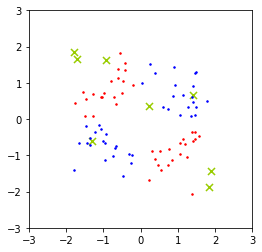

In [13]:
D = 2
K = 8
N = 80
nnn = 10000

plt.rcParams['figure.figsize'] = (4.0, 4.0)
ds1, ds2, x, w = generate_data_set_dim2_nonlinear(N)

alp = 2 * 2 * (np.random.rand(D, K) - 0.5)
plt.scatter(alp[0], alp[1], s=50, c=(0.6, 0.8, 0.), marker='x')

In [14]:
phi = 2 * 2 * (np.random.rand(1, K + 1) - 0.5)

1000 steps done for beta = 0.50, lambda = 0.20 and prior std**2 = 10000.00: 
phi = 
2.1587, -10.8839, -10.6638, -19.2964, 10.7165, 11.7060, -19.0482, -13.3460, 17.4327, 
alp = 
-0.6283, -0.5965, 1.0272, 0.4541, 1.2217, 0.8604, -1.3658, -1.0435, 
0.8186, 1.4592, -0.6981, 1.0812, 0.5719, -1.6891, 0.5055, -0.7699, 

1000 steps done for beta = 0.50, lambda = 0.50 and prior std**2 = 10000.00: 
phi = 
1.5519, -16.4328, -17.5558, -19.8261, 15.5216, 15.9829, -22.6508, -16.6626, 23.8523, 
alp = 
-1.1032, -1.1036, 1.0804, 0.9273, 0.9272, 1.0809, -1.1034, -0.9977, 
1.0024, 1.0019, -1.1595, 0.8317, 0.8318, -1.1590, 1.0023, -0.7761, 

1000 steps done for beta = 0.50, lambda = 1.00 and prior std**2 = 10000.00: 
phi = 
1.6720, -22.0884, -22.8480, -28.1504, 21.4838, 22.2250, -29.0468, -22.3034, 30.8092, 
alp = 
-1.2217, -1.2218, 1.2167, 1.1658, 1.1656, 1.2168, -1.2217, -1.1295, 
1.2096, 1.2097, -1.2065, 1.1121, 1.1120, -1.2066, 1.2097, -0.9944, 

1000 steps done for beta = 0.50, lambda = 1.50 and prio

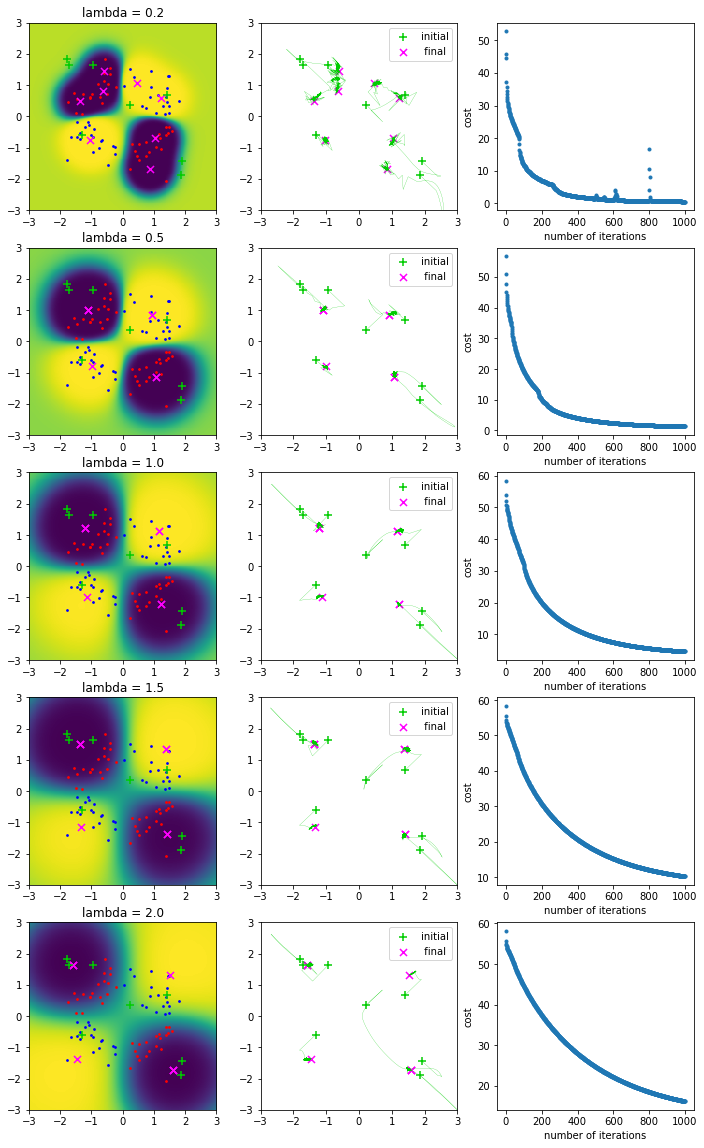

In [23]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
beta = 0.5
sgps = 10000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'adam')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

1000 steps done for beta = 0.50, lambda = 0.20 and prior std**2 = 1000.00: 
phi = 
1.0670, -6.2145, -6.0566, -9.8177, 6.4831, 7.6012, -9.9572, -7.1974, 9.9966, 
alp = 
-0.6851, -0.6077, 0.8035, 0.5144, 1.2609, 1.0899, -1.4270, -1.0175, 
0.8272, 1.4632, -1.5672, 1.0954, 0.5372, -0.7343, 0.5494, -0.7431, 

1000 steps done for beta = 0.50, lambda = 0.50 and prior std**2 = 1000.00: 
phi = 
0.7802, -8.2446, -8.3007, -10.9864, 8.7660, 8.7834, -11.1846, -8.2526, 13.1694, 
alp = 
-1.0643, -1.0645, 1.0675, 0.9971, 0.9971, 1.0678, -1.0643, -1.0016, 
1.0215, 1.0212, -1.1283, 0.8116, 0.8117, -1.1280, 1.0215, -0.8293, 

1000 steps done for beta = 0.50, lambda = 1.00 and prior std**2 = 1000.00: 
phi = 
0.8634, -10.8920, -10.9143, -14.3101, 10.6450, 10.6757, -14.4089, -10.9039, 15.4148, 
alp = 
-1.1742, -1.1742, 1.2188, 1.2264, 1.2264, 1.2189, -1.1742, -1.1733, 
1.2296, 1.2297, -1.2151, 1.0945, 1.0944, -1.2152, 1.2297, -1.0307, 

1000 steps done for beta = 0.50, lambda = 1.50 and prior std**2 = 1000.

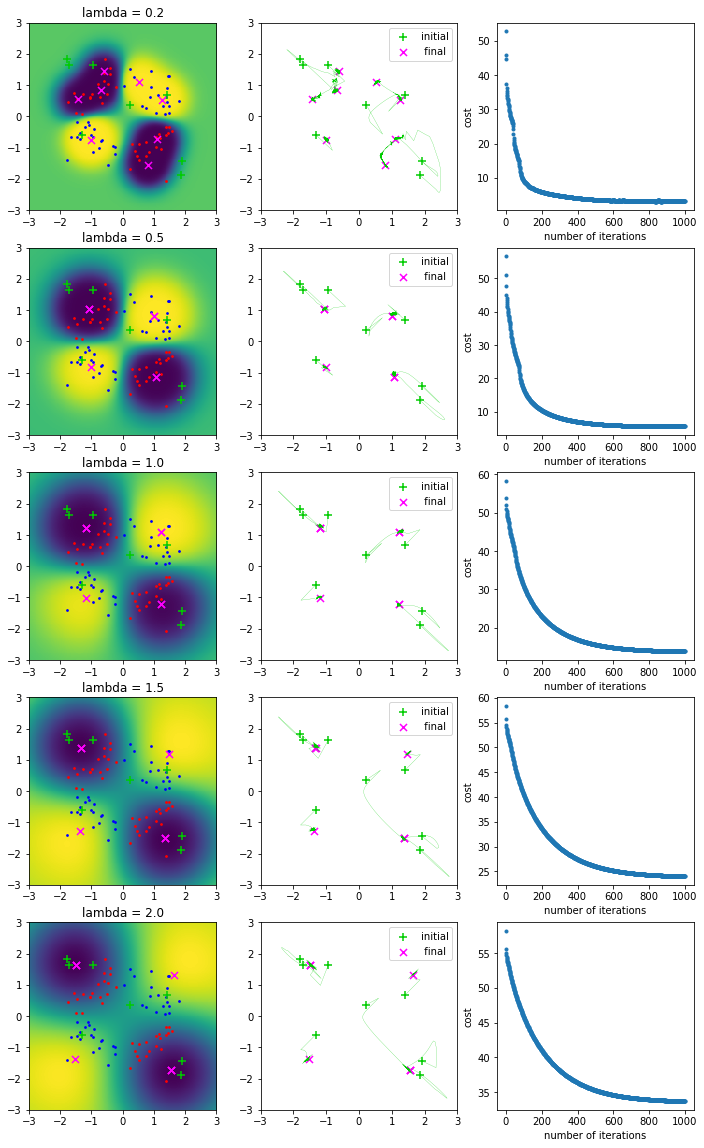

In [24]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
beta = 0.5
sgps = 1000.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'adam')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

1000 steps done for beta = 0.10, lambda = 0.20 and prior std**2 = 100.00: 
phi = 
0.3642, -0.9498, -0.9494, -0.9502, -0.9518, 0.9501, -0.9506, -0.9501, 0.9576, 
alp = 
-0.8105, -0.8134, 0.8805, 0.8728, 0.9571, 0.8792, -0.8091, -0.8877, 
0.8060, 0.8095, -0.8542, -0.8468, 0.5760, -0.8537, 0.8036, -0.6930, 

935 steps done for beta = 0.10, lambda = 0.50 and prior std**2 = 100.00: 
phi = 
0.2683, -0.9321, -0.9322, -0.9290, -0.9325, 0.9299, -0.9298, -0.9324, 0.9358, 
alp = 
-0.8074, -0.8068, 0.8559, 0.8474, 0.9001, 0.8532, -0.8061, -0.8520, 
0.8452, 0.8457, -0.8873, -0.8718, 0.7210, -0.8844, 0.8438, -0.7669, 

958 steps done for beta = 0.10, lambda = 1.00 and prior std**2 = 100.00: 
phi = 
0.1845, -0.8468, -0.8443, -0.8315, -0.8355, 0.8464, -0.8298, -0.8459, 0.8563, 
alp = 
-0.7462, -0.7492, 0.7775, 0.7766, 0.8179, 0.7769, -0.7491, -0.7869, 
0.8084, 0.8094, -0.8207, -0.8187, 0.7080, -0.8204, 0.8085, -0.7401, 

1000 steps done for beta = 0.10, lambda = 1.50 and prior std**2 = 100.00: 
phi = 

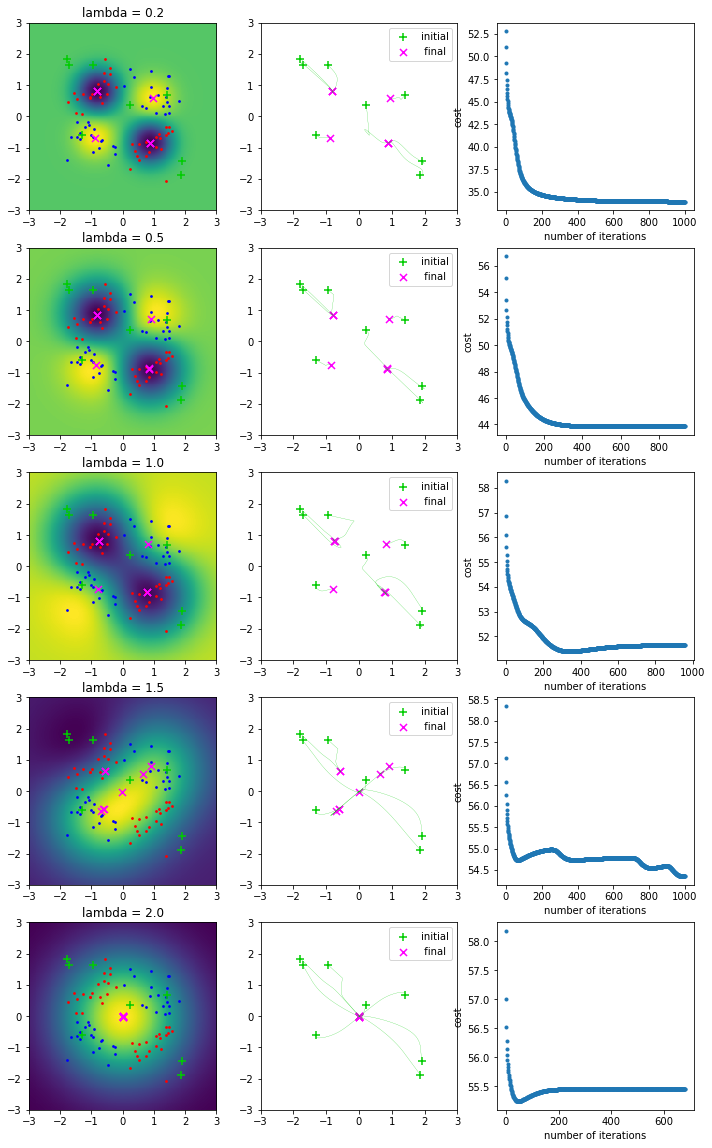

In [28]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
beta = 0.1
sgps = 100.0
lmds = [0.2, 0.5, 1.0, 1.5, 2.0]
ax = 0
for lmd in lmds:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'adam')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('lambda = {}'.format(lmd))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')

1000 steps done for beta = 0.01, lambda = 0.50 and prior std**2 = 1000.00: 
phi = 
0.0624, -0.7662, -0.1933, -0.3716, -0.7050, 0.9841, -0.1096, -0.8133, 1.0052, 
alp = 
-0.9059, -0.8905, 0.9635, -0.6148, 1.0959, 0.9962, -0.8957, -1.0088, 
0.9350, 0.9043, -0.9682, 0.7622, 0.7980, -1.0166, 0.9317, -0.7663, 

1000 steps done for beta = 0.05, lambda = 0.50 and prior std**2 = 1000.00: 
phi = 
0.5828, -2.8872, -2.6171, -2.9421, -2.9650, 3.3153, -2.8037, -2.9840, 3.3465, 
alp = 
-1.0637, -1.0621, 1.0190, -1.0628, 1.0948, 1.0171, -1.0635, -1.0618, 
1.0493, 1.0486, -1.0371, 1.0495, 0.8685, -1.0363, 1.0494, -0.8032, 

1000 steps done for beta = 0.30, lambda = 0.50 and prior std**2 = 1000.00: 
phi = 
0.8209, -7.8726, -8.0742, -10.2041, 8.1659, 8.2334, -10.5033, -7.9076, 11.5263, 
alp = 
-1.0671, -1.0674, 1.0762, 0.9890, 0.9889, 1.0764, -1.0671, -0.9921, 
1.0232, 1.0230, -1.1077, 0.8297, 0.8297, -1.1076, 1.0232, -0.8282, 

1000 steps done for beta = 1.00, lambda = 0.50 and prior std**2 = 1000.00: 

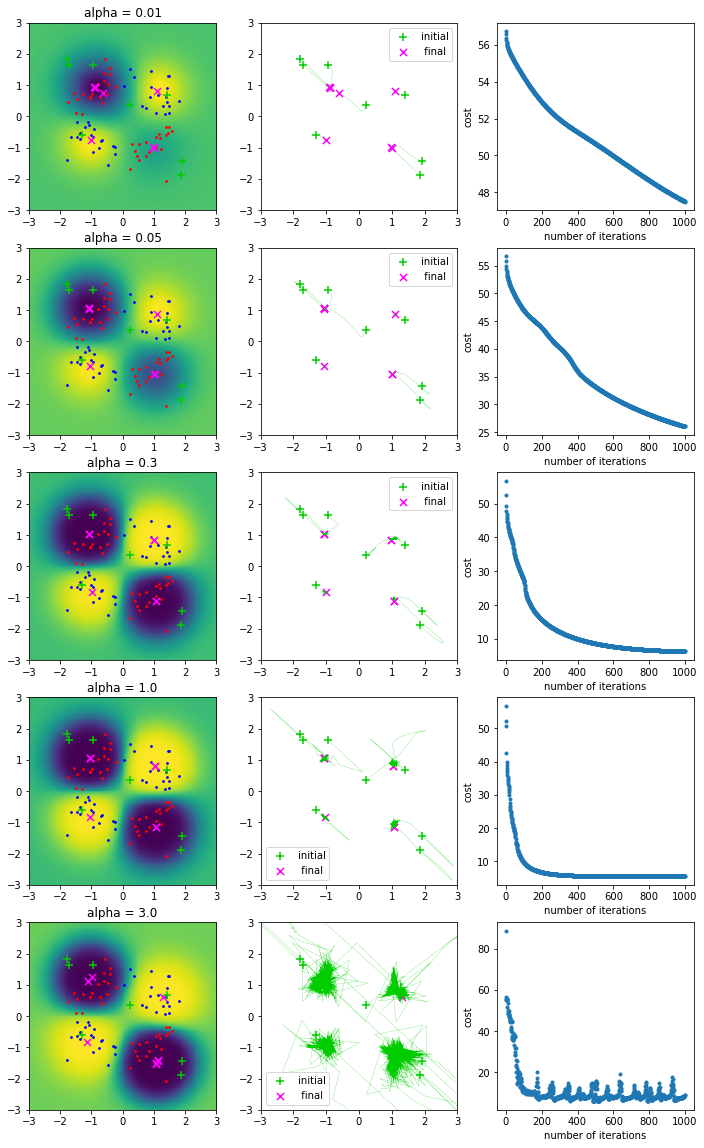

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 20.0)
nnn = 1000
betas = [0.01, 0.05, 0.3, 1.0, 3.0]
sgps = 1000.0
lmd = 0.5
ax = 0
for beta in betas:
    z = radial_basis(x, alp, lmd, D, K, N)
    phio, alpo, theta, cost, step, alps = optimization(z, x, w, phi, alp, lmd, sgps, nnn, beta, 'adam')

    ax += 1
    plt.subplot(5, 3, ax)
    bd = plot_decision_boundary_dim2(phio, alpo, lmd)
    plt.scatter(ds1[0], ds1[1], c=(1., 0., 0.), s=3)
    plt.scatter(ds2[0], ds2[1], c=(0., 0., 1.), s=3)
    plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title('alpha = {}'.format(beta))

    ax += 1
    plt.subplot(5, 3, ax)
    for k in range(alps.shape[2]):
        plt.plot(alps[:, 0, k], alps[:, 1, k], '-', lw = 0.2, color=(0.0, 0.8, 0.0))
    final = plt.scatter(alpo[0], alpo[1], s=50, c=(1.0, 0.0, 1.0), marker='x')
    initi = plt.scatter(alp[0], alp[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
    plt.legend([initi, final], ["initial", " final"])
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

    ax += 1
    plt.subplot(5, 3, ax)
    plt.plot(np.arange(step), cost, '.')
    plt.xlabel('number of iterations')
    plt.ylabel('cost')